## This Notebook is Meant to Compare the following inference results:
* 022924: Finetuned on data with concurrent results and signed by not filtered out yet. Also some of Weihe's reports did not have a FINDINGS: and IMPRESSION: label. Question asked included the patient, author, clinical history information. Asked the result to be very specific for the author.
* 030224: (based on 022924 model) same finetune as above, but created a cleaner inference dataset with the cleaning described above performed. Question was... (fill in question here)
* 030324: new fine tune, just asked llava to be more explicit given the image. no clinical history, author, or any extra information given in prompt to test the abilities of llava to discern the image. Two inferences performed: the first being with the clinical history, author and patient information and the other being the exact same as the fine tuned prompt without all the extra information for the LLM to base its answer off of to determine whether the first inference performed poorly due to a lack of generalization of the model to new prompts (basically seeing if we need more diverse prompts in a fine tune), or if the vision encoder that comes with llava is just not that good at reading x-rays, so that we need to sub out the encoder if we actually want this LLM to perform (which will require much more compute I'm sure and probably a bigger version of LLaVA). 

In summary, we have two recent checkpoints on the cleanest data (02-26.5-24 might have cleaner data, too). We might need just one more finetune to finalize the results, so that we can compare the 03-03-24 model with a later March model for poster, paper results. Each of these checkpoints have two sets of inference where one has the original question asked and the other has a different question asked, testing the ability of the model to generalize to new questions. (still should pull it up to the terminal and compare in a converstational setting--this is the final test of the model, imo).

ALSO: need to classify the new inference datasets to create confusion tables!

In [1]:
from bart_eval import * 
from eval_script import * 

Get the exact model prompts (filtered them out of test inference when I shouldn't have):

In [2]:
path = '../raymond/'

# load a prompt from the 022924 fine tune training set
print(pd.read_json(path + '022924patient_finding_impression.json')['conversations'].iloc[0])

[{'from': 'human', 'value': 'AUTHOR: Yen, Andrew \nCLINICAL HISTORY: S/p placement of PICC\nCONTEXT: Outpatient\nAGE: 58\nSEX: Male\nBased on AUTHOR and CLINICAL HISTORY, suppose you were a radiologist on X-RAY,  could you provide a detailed report from this chest X-ray?'}, {'from': 'gpt', 'value': 'FINDINGS:\nLines and Tubes: Left arm PICC with the tip projecting to mid-lower superior vena cava.  Mediastinum: The cardiomediastinal silhouette is unchanged.  Lungs: Improvement in bilateral apical heterogenous opacities.  Pleura: No pneumothorax or pleural effusion.  Bones and soft tissues: Unchanged. Surgical clips overlie right and left upper abdomen.    CONCURRENT SUPERVISION:  I have reviewed the images and agree with the resident interpretation.           Preliminary created by: Alla, Juliet\n\nIMPRESSION: Left arm PICC with tip projecting to the mid-lower superior vena cava.    No acute cardiopulmonary findings.'}]


In [3]:
# 022924 inference question (aligned with fine tune)
print(pd.read_json(path + '022924_test_answers.jsonl', lines=True)['prompt'].iloc[0])

AUTHOR: Jacobs, Kathleen 
CLINICAL HISTORY: Chest pain
CONTEXT: Outpatient
AGE: 69
SEX: Female
Based on AUTHOR and CLINICAL HISTORY, suppose you were a radiologist on X-RAY,  could you provide a detailed report from this chest X-ray?


In [4]:
# 030224 inference (on 022924 fine tune), which still gives the patient information
# but asks a different question from a the one it was trained on 
print(pd.read_json(path + '030224_test_answers.jsonl', lines=True)['prompt'].iloc[0])

AUTHOR: Jacobs, Kathleen 
CLINICAL HISTORY: Chest pain
CONTEXT: Outpatient
AGE: 69
SEX: Female
Provide a detailed report given the chest X-RAY. Do not compare with prior X-RAY, only describe what you see in the given xray.


In [5]:
# load a prompt from the 030324 fine tune training set 
print(pd.read_json(path + '030324patient_finding_impression.json')['conversations'].iloc[0])

[{'from': 'human', 'value': 'Write a report for the given chest x-ray. It should contain a clear findings and impression section.  Be explicit for any abnormalities or normal findings.'}, {'from': 'gpt', 'value': 'FINDINGS:\nLines and Tubes: Left arm PICC with the tip projecting to mid-lower superior vena cava.  Mediastinum: The cardiomediastinal silhouette is unchanged.  Lungs: Improvement in bilateral apical heterogenous opacities.  Pleura: No pneumothorax or pleural effusion.  Bones and soft tissues: Unchanged. Surgical clips overlie right and left upper abdomen.    IMPRESSION: Left arm PICC with tip projecting to the mid-lower superior vena cava.    No acute cardiopulmonary findings.'}]


In [6]:
# This is for inference on the 030324 finetune, but gives context, but asks the same question
print(pd.read_json(path + '030324_test_answers.jsonl', lines=True)['prompt'].iloc[0])

AUTHOR: Jacobs, Kathleen 
CLINICAL HISTORY: Chest pain
CONTEXT: Outpatient
AGE: 69
SEX: FemaleWrite a report for the given chest x-ray. It should contain a clear findings and impression section.  Be explicit for any abnormalities or normal findings.


In [7]:
# inference on 030324 model but without the information just to see if anything is different
print(pd.read_json(path + '030324_test_answers01.jsonl', lines=True)['prompt'].iloc[0])

Write a report for the given chest x-ray. It should contain a clear findings and impression section.  Be explicit for any abnormalities or normal findings.


#### Load in test inferences and make comparisons

In [8]:
v1 = pd.read_csv('02-29-24/data/test_inference.csv')
v2 = pd.read_csv('03-02-24/data/test_inference.csv')
v3 = pd.read_csv('03-03-24/data/test_inference.csv')
v4 = pd.read_csv('03-03-24-01/data/test_inference.csv')

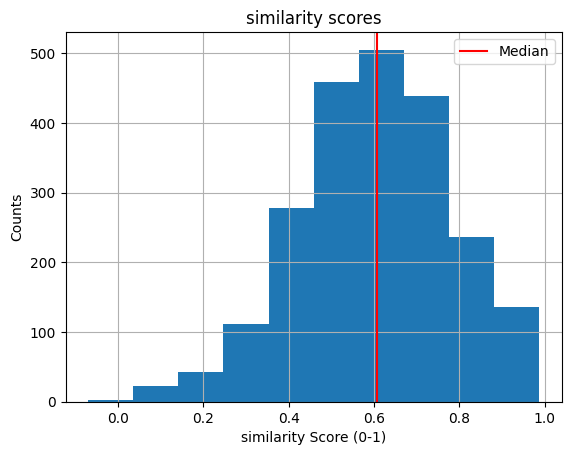

In [9]:
plot_sim_scores(v1);

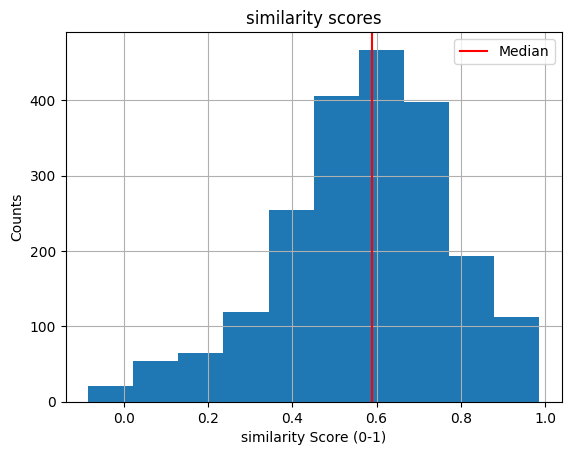

In [10]:
plot_sim_scores(v2);

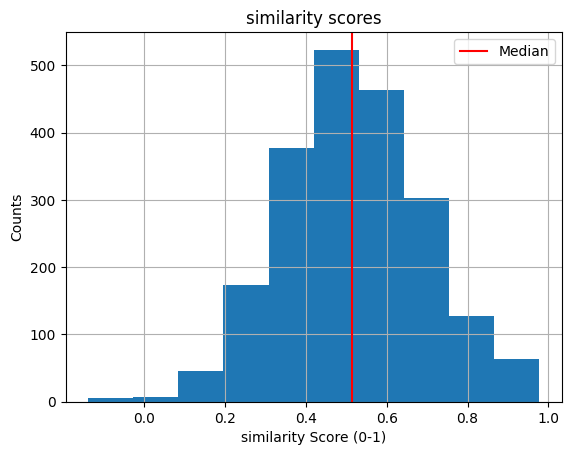

In [11]:
plot_sim_scores(v3);

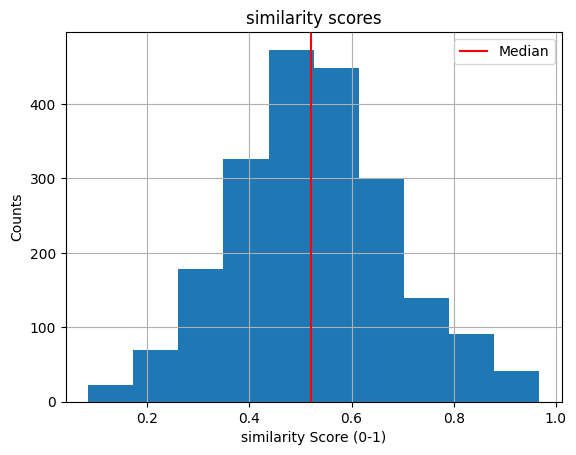

In [12]:
plot_sim_scores(v4);

In [13]:
v1.head()

,id,phonetic_id,author,llava_findings,llava_impression,llava_report,radiologist_report,radiologist_findings,radiologist_impression,similarity,impression_similarity,findings_similarity,is_si_l,is_si_r,lf_len,li_len,rf_len,ri_len
0,54059849,Abifel,"Jacobs, Kathleen",NaN,IMPRESSION: No acute findings.,Lungs are well expanded. Lungs are clear. No p...,FINDINGS:\nLungs are well expanded and clear. ...,FINDINGS:\nLungs are well expanded and clear. ...,IMPRESSION: No acute findings.,0.976522,1.000000,-0.005850,True,False,0,30,184,30
1,53428634,Aburik,"Hahn, Lewis",FINDINGS:\nLines and Tubes: Interval placement...,IMPRESSION: Right upper extremity PICC termina...,FINDINGS:\nLines and Tubes: Interval placement...,FINDINGS:\nLines and Tubes: Right upper extrem...,FINDINGS:\nLines and Tubes: Right upper extrem...,IMPRESSION: Right upper extremity PICC termina...,0.802228,0.880665,0.939317,False,False,292,67,328,86
2,53439132,Achoroos,"Smitaman, Edward",FINDINGS:\nPlease see Impression.\n\n,IMPRESSION: Redemonstration of a left-sided AI...,FINDINGS:\nPlease see Impression.\n\nIMPRESSIO...,FINDINGS:\nLines and Tubes: None Mediastinum:...,FINDINGS:\nLines and Tubes: None Mediastinum:...,IMPRESSION: No acute pulmonary findings.,0.447024,0.658687,0.252595,True,False,34,221,325,40
3,50219723,Ackoofdek,"Wyatt, Alvin",FINDINGS:\nSee impression\n\n,IMPRESSION: No significant change from 10/22/2...,FINDINGS:\nSee impression\n\nIMPRESSION: No si...,FINDINGS:\nSee impression\n\nIMPRESSION: Exam ...,FINDINGS:\nSee impression\n\n,IMPRESSION: Exam is somewhat limited by patien...,0.353085,0.586219,1.000000,True,True,26,88,26,325
4,52165792,Adefoup,"Weihe, Elizabeth",FINDINGS:/: \nThe cardiac silhouette and med...,NaN,FINDINGS:/: \nThe cardiac silhouette and med...,FINDINGS:/: \nNo evidence for focal pneumoni...,FINDINGS:/: \nNo evidence for focal pneumoni...,NaN,0.621795,1.000000,0.883026,False,False,223,0,332,0


In [14]:
from transformers import pipeline
classifier = pipeline("zero-shot-classification", model="valhalla/distilbart-mnli-12-3", multilabel=True)

/home/llm-hackathon/enter/envs/datalite_env/lib/python3.10/site-packages/torch/_utils.py:831: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  return self.fget.__get__(instance, owner)()


In [69]:
report =  v1['radiologist_report'].iloc[17]
print(report)

FINDINGS:
Lines and Tubes: None
Mediastinum: The cardiomediastinal silhouette is enlarged but unchanged. There is a large pericardial effusion. No lymphadenopathy is appreciated.
Lungs: Multiple pulmonary nodules are unchanged. Left mid and lower lung consolidation is unchanged. There is right basilar opacity. Perihilar opacity is present
Pleura: Left effusion is present
Bones and soft tissues: Unchanged

IMPRESSION: Left mid and lower lung pneumonia. Pulmonary metastasis


In [70]:
CANDIDATE_LABELS = ['no pneumonia', 'mild pneumonia', 'moderate pneumonia', 'severe pneumonia']

In [71]:
classifier(report, CANDIDATE_LABELS)

{'sequence': 'FINDINGS:\nLines and Tubes: None\nMediastinum: The cardiomediastinal silhouette is enlarged but unchanged. There is a large pericardial effusion. No lymphadenopathy is appreciated.\nLungs: Multiple pulmonary nodules are unchanged. Left mid and lower lung consolidation is unchanged. There is right basilar opacity. Perihilar opacity is present\nPleura: Left effusion is present\nBones and soft tissues: Unchanged\n\nIMPRESSION: Left mid and lower lung pneumonia. Pulmonary metastasis',
 'labels': ['no pneumonia',
  'severe pneumonia',
  'moderate pneumonia',
  'mild pneumonia'],
 'scores': [0.3573012948036194,
  0.32719895243644714,
  0.19817177951335907,
  0.11732802540063858]}

In [ ]:
# NEED TO TRY BIO BART OR BETTER EVAL UG